(ws8)=
# Worksheet 8

## To accompany Unit 4.3 Fourier Transforms for Circuit and LTI Systems Analysis

This worksheet can be downloaded as a [PDF file](https://cpjobling.github.io/eg-247-textbook/worksheets/worksheet8.pdf). We will step through this worksheet in class. 

An annotatable copy of the notes for this presentation will be distributed before the second class meeting as **Worksheet 8** in the **Week 6: Classroom Activities** section of the Canvas site. I will also distribute a copy to your personal **Worksheets** section of the **OneNote Class Notebook** so that you can add your own notes using OneNote. 

You are expected to have at least watched the video presentation of {ref}`ft3` of the [notes](https://cpjobling.github.io/eg-247-textbook/) before coming to class. If you haven't watch it afterwards!

After class, the lecture recording and the annotated version of the worksheets will be made available through Canvas.

## The System Function

### System response from system impulse response

Recall that the convolution integral of a system with impulse response $h(t)$ and input $u(t)$ is

$$h(t)*u(t)=\int_{-\infty}^{\infty}h(t-\tau)u(\tau)\,d\tau.$$

We let 

$$g(t) = h(t)*u(t)$$

Then by the time convolution property

$$h(t)*u(t) = g(t) \Leftrightarrow G(\omega) = H(\omega).U(\omega)$$

We call $H(\omega)$ the *system function*.

We note that the system function $H(\omega)$ and the impulse response $h(t)$ form the Fourier transform pair

$$h(t) \Leftrightarrow H(\omega)$$


### Obtaining system response

If we know the impulse resonse $h(t)$, we can compute the system response $g(t)$ of any input $u(t)$ by multiplying the Fourier transforms of $H(\omega)$ and $U(\omega)$ to obtain $G(\omega)$. Then we take the inverse Fourier transform of $G(\omega)$ to obtain the response $g(t)$.

1. Transform $h(t) \to H(\omega)$
2. Transform $u(t) \to U(\omega)$
3. Compute $G(\omega) = H(\omega).U(\omega)$
4. Find $\mathcal{F}^{-1}\left\{G(\omega)\right\} \to g(t)$

## Examples

### Example 1

Karris example 8.8: for the linear network shown below, the impulse response is $h(t)=3e^{-2t}u_0(t)$. Use the Fourier transform to compute the response $y(t)$ when the input $u(t)=2[u_0(t)-u_0(t-3)]$. Verify the result with MATLAB.

![Example 1](./pictures/example1.png)

Worked solution: [ft3-ex1.pdf](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3-ex1.pdf).

MATLAB solution: [ft3_ex1.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3_ex1.mlx).


#### Solution to example 1

<pre style="border: 2px solid blue">
























</pre>

#### MATLAB verification of example 1

In [1]:
format compact
cd ../matlab
open ft3_ex1

In [2]:
syms t w
U1 = fourier(2*heaviside(t),t,w)

U1 =
2*pi*dirac(w) - 2i/w


In [3]:
H = fourier(3*exp(-2*t)*heaviside(t),t,w)

H =
3/(2 + w*1i)


In [4]:
Y1=simplify(H*U1)

Y1 =
3*pi*dirac(w) - 6i/(w*(2 + w*1i))


In [5]:
y1 = simplify(ifourier(Y1,w,t))

y1 =
(3*exp(-2*t)*(sign(t) + 1)*(exp(2*t) - 1))/2


Get y2

Substitute $t-3$ into $t$.

In [6]:
y2 = subs(y1,t,t-3)

y2 =
(3*exp(6 - 2*t)*(sign(t - 3) + 1)*(exp(2*t - 6) - 1))/2


In [7]:
y = y1 - y2

y =
(3*exp(-2*t)*(sign(t) + 1)*(exp(2*t) - 1))/2 - (3*exp(6 - 2*t)*(sign(t - 3) + 1)*(exp(2*t - 6) - 1))/2


The result is equivalent to:
    
    y = 3*heaviside(t) - 3*heaviside(t - 3) + 3*heaviside(t - 3)*exp(6 - 2*t) - 3*exp(-2*t)*heaviside(t)

Which after gathering terms gives

$$y(t) = 3(1 - 3e^{-2t})u_0(t) - 3(1 - 3e^{-2(t-3)})u_0(t-3)$$

Plot the result

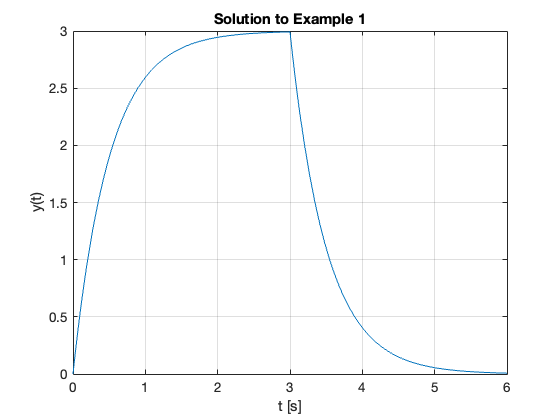

In [8]:
fplot(y,[0,6])
title('Solution to Example 1')
ylabel('y(t)')
xlabel('t [s]')
grid 

See [ft3_ex1.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/matlab/ft3_ex1.mlx)

### Example 2

Karris example 8.9: for the circuit shown below, use the Fourier transfrom method, and the system function $H(\omega)$ to compute $v_L(t)$. Assume $i_L(0^-)=0$. Verify the result with MATLAB.

![Example 2](./pictures/example2-small.png)

Worked solution: [ft3-ex2.pdf](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3-ex2.pdf).

MATLAB solution: [ft3_ex2.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3_ex2.mlx).


#### Solution to example 2

<pre style="border: 2px solid blue">
























</pre>

#### MATLAB verification of example 2

In [9]:
syms t w
H = j*w/(j*w + 2)

H =
(w*1i)/(2 + w*1i)


In [10]:
Vin = fourier(5*exp(-3*t)*heaviside(t),t,w)

Vin =
5/(3 + w*1i)


In [11]:
V_L=simplify(H*Vin)

V_L =
(w*5i)/((2 + w*1i)*(3 + w*1i))


In [12]:
v_L = simplify(ifourier(V_L,w,t))

v_l =
-(5*exp(-3*t)*(sign(t) + 1)*(2*exp(t) - 3))/2


The result is equivalent to:
    
    v_L = -5*exp(-3*t)*heaviside(t)*(2*exp(t) - 3)

Which after gathering terms gives

$$v_{L} = 5\left(3e^{-3t} - 2e^{-2t}\right)u_0(t)$$


Plot the result

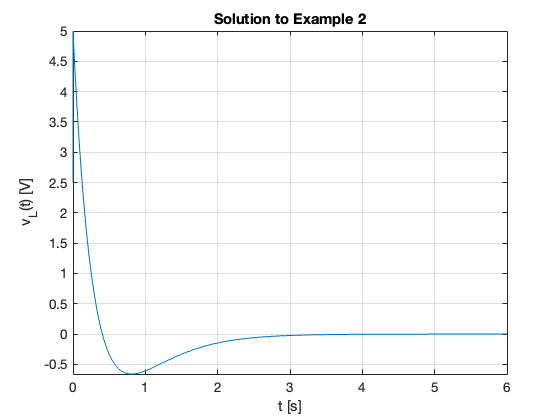

In [13]:
fplot(v_l,[0,6])
title('Solution to Example 2')
ylabel('v_{L}(t) [V]')
xlabel('t [s]')
grid 

### Example 3

Karris example 8.10: for the linear network shown below, the input-output relationship is:

$$\frac{d}{dt}v_{\mathrm{out}}+4v_{\mathrm{out}}=10v_{\mathrm{in}}$$

where $v_{\mathrm{in}}=3e^{-2t}$. Use the Fourier transform method, and the system function $H(\omega)$ to compute the output $v_{\mathrm{out}}$. Verify the result with MATLAB.

![Example 3](./pictures/example3-small.png)

Worked solution: [ft3-ex3.pdf](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3-ex3.pdf).

MATLAB solution: [ft3_ex3.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3_ex3.mlx).


#### Solution to example 3

<pre style="border: 2px solid blue">
























</pre>

#### MATLAB verification of example 3

In [14]:
syms t w
H = 10/(j*w + 4)

H =
10/(4 + w*1i)


In [15]:
Vin = fourier(3*exp(-2*t)*heaviside(t),t,w)

Vin =
3/(2 + w*1i)


In [16]:
Vout=simplify(H*Vin)

Vout =
30/((2 + w*1i)*(4 + w*1i))


In [17]:
vout = simplify(ifourier(Vout,w,t))

vout =
(15*exp(-4*t)*(sign(t) + 1)*(exp(2*t) - 1))/2


The result is equiavlent to:
    
    15*exp(-4*t)*heaviside(t)*(exp(2*t) - 1)

Which after gathering terms gives

$$v_{\mathrm{out}}(t) = 15\left(e^{-2t} - e^{-4t}\right)u_0(t)$$

Plot result

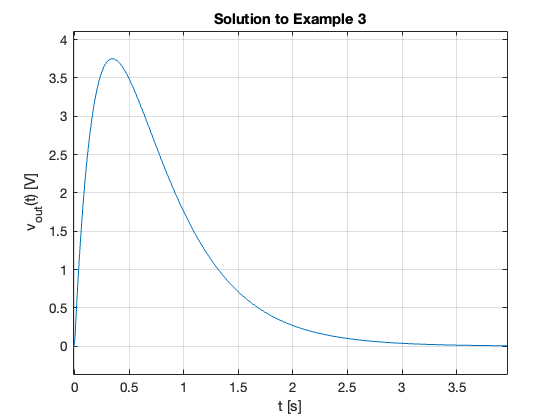

In [18]:
ezplot(vout)
title('Solution to Example 3')
ylabel('v_{out}(t) [V]')
xlabel('t [s]')
grid 

### Example 4

Karris example 8.11: the voltage across a 1 $\Omega$ resistor is known to be $V_{R}(t)=3e^{-2t} u_0(t)$. Compute the energy dissipated in the resistor for $0\lt t\lt\infty$, and verify the result using Parseval's theorem. Verify the result with MATLAB.

Note from [tables of integrals](https://en.wikipedia.org/wiki/Lists_of_integrals) 

$$\int\frac{1}{a^2 + x^2}\,dx = \frac{1}{a}\arctan\frac{x}{a}+C.$$

![Example 4](./pictures/example4-small.png)

Worked solution: [ft3-ex4.pdf](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3-ex4.pdf).

MATLAB solution: [ft3_ex4.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/ft3_ex4.mlx).


#### Solution to example 4

<pre style="border: 2px solid blue">
























</pre>

#### MATLAB verification of example 4

In [19]:
syms t w

Calcuate the energy from the time function

In [26]:
Vr = 3*exp(-2*t)*heaviside(t);
R = 1;
Pr = Vr^2/R
Wr = int(Pr,t,0,inf)
double(Wr)

Pr =
9*exp(-4*t)*heaviside(t)^2
Wr =
9/4
ans =
    2.2500


Calculate using Parseval's theorem

In [21]:
Fw = fourier(Vr,t,w)

Fw =
3/(2 + w*1i)


In [22]:
Fw2 = simplify(abs(Fw)^2)

Fw2 =
9/abs(2 + w*1i)^2


In [27]:
Wr=2/(2*pi)*int(Fw2,w,0,inf)
double(Wr)

Wr =
(51607450253003931*pi)/72057594037927936
ans =
    2.2500
